# Importing SDSS Spectra

## Method 1: Astropy

In [106]:
from astroquery.sdss import SDSS

In [107]:
from astropy import coordinates as coords

In [108]:
from astropy import units as u

In [109]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [110]:
from astropy.io import fits
from astropy.table import Table

In [6]:
pos = coords.SkyCoord('0h8m05.63s +14d50m23.3s', frame='icrs')

In [8]:
ra = np.array([358.26])
dec = np.array([36.40])
coordinates = coords.SkyCoord(ra, dec, frame='icrs', unit='deg')

In [9]:
xid = SDSS.query_region(pos, radius=3*u.arcmin, spectro=True)

In [10]:
xid = SDSS.query_region(coordinates, radius=30*u.arcmin, spectro=True)

/astro/users/brycek/.conda/envs/py3-bryce/lib/python3.7/site-packages/astroquery/sdss/core.py:877: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  comments='#'))


In [11]:
xid_pandas = xid.to_pandas().query('plate == 1880')

In [332]:
xid = Table().from_pandas(xid_pandas)

In [13]:
len(xid)

77

In [14]:
sp = SDSS.get_spectra(matches=xid)

In [15]:
len(sp)

77

In [16]:
sp[0]

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f5deb265fd0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f5deb2484e0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f5deb2913c8>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f5deacbff28>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f5deac55be0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f5deac6e630>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f5deac06080>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f5deac17a90>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f5deac2f4e0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f5deac41ef0>]

In [17]:
sp[0][0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
TAI     =        4601873403.77 / 1st row - Number of seconds since Nov 17 1858  
RA      =            358.26367 / 1st row - Right ascension of telescope boresigh
DEC     =            36.401550 / 1st row - Declination of telescope boresight (d
EQUINOX =              2000.00 /                                                
RADECSYS= 'FK5     '           /                                                
TAIHMS  = '09:55:05.23'        / 1st row - TAI time (HH:MM:SS.SS) (TAI-UT = appr
TIMESYS = 'tai     '           / TAI, not UTC                                   
MJD     =                53262 / MJD of observation                             
MJDLIST = '53262   '        

In [19]:
sp[0][2].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1068 / length of dimension 1                          
NAXIS2  =                    1 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                  126 / number of table fields                         
TTYPE1  = 'SURVEY  '                                                            
TFORM1  = '6A      '                                                            
TTYPE2  = 'INSTRUMENT'                                                          
TFORM2  = '4A      '                                                            
TTYPE3  = 'CHUNK   '        

In [67]:
len(sp[0])

10

Text(0, 0.5, 'Flux (erg/cm^2/s/Ang)')

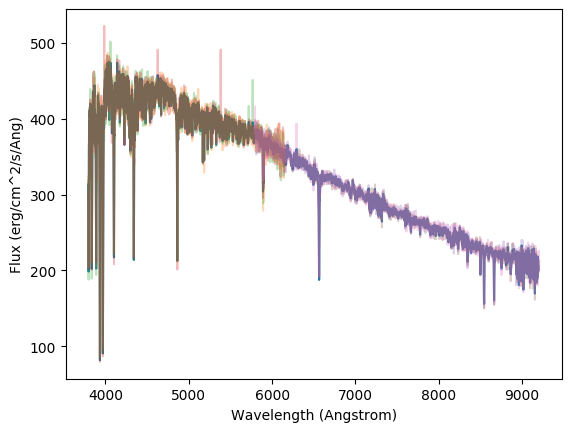

In [75]:
plt.plot(np.power(10, sp[0][1].data['loglam']), sp[0][1].data['flux'])
plt.plot(np.power(10, sp[0][4].data['loglam']), sp[0][4].data['flux'], alpha=0.3)
plt.plot(np.power(10, sp[0][5].data['loglam']), sp[0][5].data['flux'], alpha=0.3)
plt.plot(np.power(10, sp[0][6].data['loglam']), sp[0][6].data['flux'], alpha=0.3)
plt.plot(np.power(10, sp[0][7].data['loglam']), sp[0][7].data['flux'], alpha=0.3)
plt.plot(np.power(10, sp[0][8].data['loglam']), sp[0][8].data['flux'], alpha=0.3)
plt.plot(np.power(10, sp[0][9].data['loglam']), sp[0][9].data['flux'], alpha=0.3)
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux (erg/cm^2/s/Ang)')

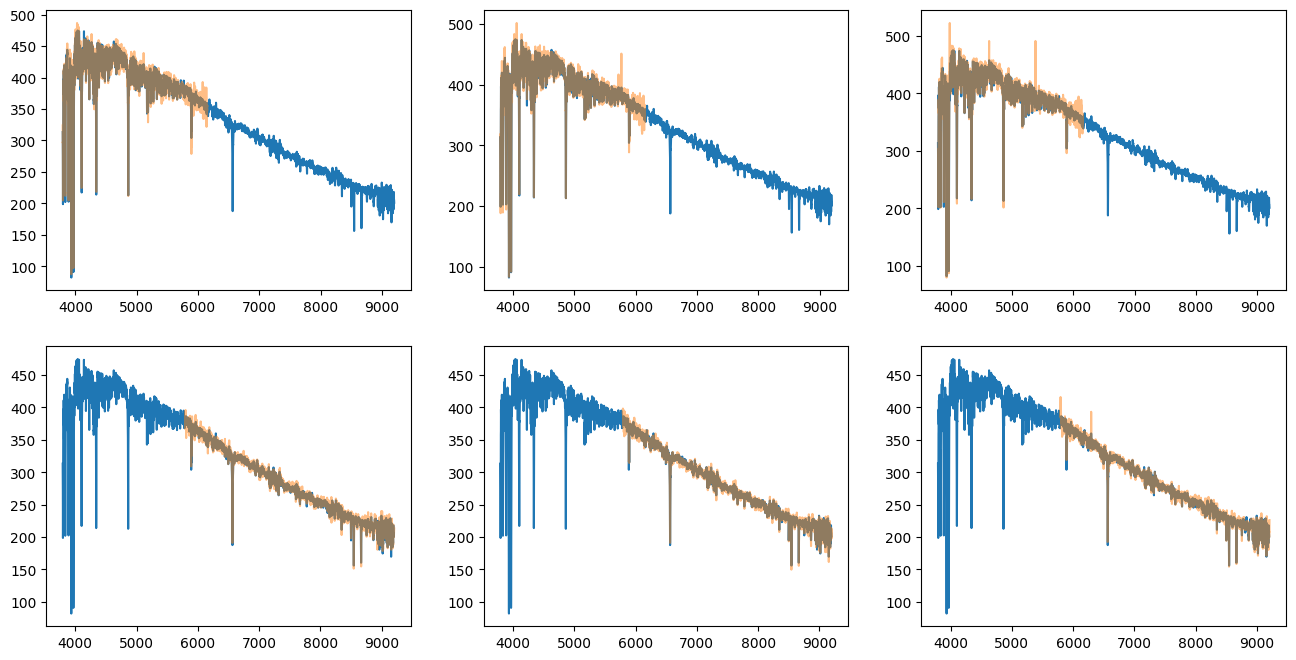

In [80]:
fig = plt.figure(figsize=(16, 8))
for i in range(6):
    fig.add_subplot(2,3,i+1)
    plt.plot(np.power(10, sp[0][1].data['loglam']), sp[0][1].data['flux'])
    plt.plot(np.power(10, sp[0][i+4].data['loglam']), sp[0][i+4].data['flux'], alpha=0.5)

Text(0, 0.5, 'Flux (erg/cm^2/s/Ang)')

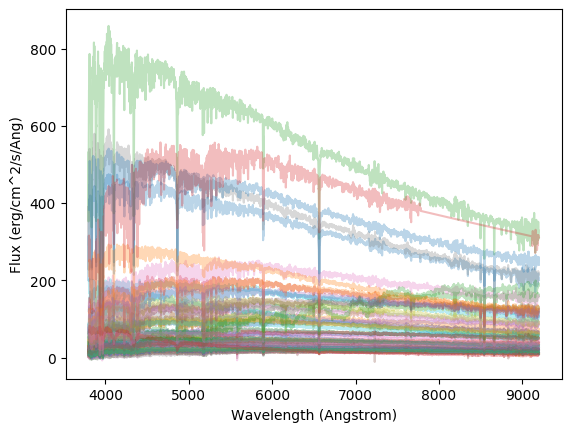

In [102]:
for i in range(len(xid)):
    plt.plot(np.power(10, sp[i][1].data['loglam']), sp[i][1].data['flux'], alpha=0.3)
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux (erg/cm^2/s/Ang)')

Text(0, 0.5, 'Flux (erg/cm^2/s/Ang)')

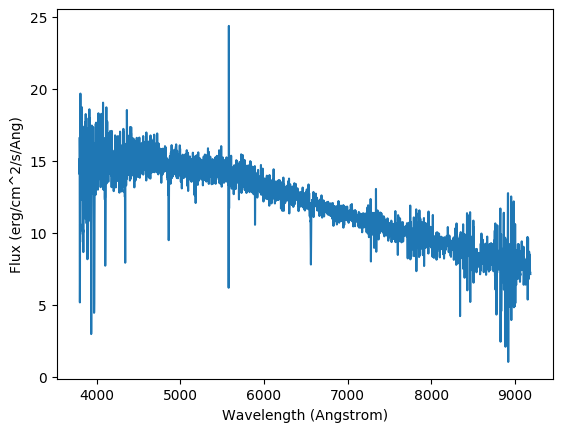

In [55]:
plt.plot(np.power(10, sp[4][1].data['loglam']), sp[4][1].data['flux'])
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux (erg/cm^2/s/Ang)')

## Method 2: Directly from SDSS Website

### SDSS Spectrograph Info

SDSS Spectra Info: http://www.sdss3.org/dr9/spectro/spectro_basics.php

Info on SDSS Spectrograph: https://classic.sdss.org/dr7/instruments/spectrographs/index.html

### SEGUE Survey Data

I think the data most interesting to us for now is the SEGUE survey data: https://www.sdss4.org/dr17/tutorials/segue_getting_started/

Most interesting on that page is the section titled: "Extracting SEGUE spectra"

List of SEGUE plate numbers: https://www.sdss4.org/dr17/algorithms/segue_plate_table/

Better way to do this is to get the following file with all plate information:


In [331]:
! wget https://dr17.sdss.org/sas/dr17/sdss/spectro/redux/plates-dr17.fits

--2022-12-01 14:37:56--  https://dr17.sdss.org/sas/dr17/sdss/spectro/redux/plates-dr17.fits
Resolving dr17.sdss.org (dr17.sdss.org)... 155.101.19.32
Connecting to dr17.sdss.org (dr17.sdss.org)|155.101.19.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6981120 (6.7M) [application/octet-stream]
Saving to: ‘plates-dr17.fits.2’

100%[======================================>] 6,981,120   3.23MB/s   in 2.1s   

2022-12-01 14:37:59 (3.23 MB/s) - ‘plates-dr17.fits.2’ saved [6981120/6981120]



In [114]:
plate_info = Table(fits.open('plates-dr17.fits')[1].data).to_pandas()

In [115]:
# Find the unique survey names
np.unique(plate_info['PROGRAMNAME'])

array(['DEEP_QSO                   ', 'ELG_NGC                    ',
       'ELG_SGC                    ', 'Orion_Taurus               ',
       'RM                         ', 'SEGUE_GES                  ',
       'SEQUELS_ELG                ', 'XMMXLL                     ',
       'apbias                     ', 'boss                       ',
       'boss_lofar                 ', 'commissioning              ',
       'disk                       ', 'eFEDS                      ',
       'eboss                      ', 'fstars                     ',
       'hyades                     ', 'legacy                     ',
       'lowz                       ', 'lowz_loveday               ',
       'lowz_lrg                   ', 'm31_fstars                 ',
       'msturnoff                  ', 'orion                      ',
       'perseus                    ', 'photoz                     ',
       'preboss                    ', 'premarvels_preselection    ',
       'reddening                 

In [116]:
# We want to explore segue1 and segue2 data
segue_plates = plate_info.query('PROGRAMNAME == "segue                      " or PROGRAMNAME == "segue2                     "')

In [117]:
segue_plates

,PLATEID,FIRSTRELEASE,RUN2D,RUN1D,RUNSSPP,PLATE,TILE,DESIGNID,LOCATIONID,MJD,...,IS_TILE,IS_PRIMARY,IS_BEST,HA,MJDDESIGN,THETA,FSCAN_VERSION,FMAP_VERSION,FSCAN_MODE,FSCAN_SPEED
1636,2116691879591438336,dr7,26,,122,1880,9504,-1,-1,53262,...,0,1,1,0.0,53249,0.0,v4_3_1,v4_3_1,extreme,500
1640,2121195478648383488,dr7,26,,122,1884,9508,-1,-1,53228,...,0,1,1,0.0,53249,0.0,v4_3_1,v4_3_1,extreme,500
1642,2123447278613063680,dr7,26,,122,1886,9510,-1,-1,53237,...,0,1,1,0.0,53249,0.0,v4_3_1,v4_3_1,extreme,500
1644,2125699078460303360,dr7,26,,122,1888,9512,-1,-1,53239,...,0,1,1,0.0,53249,0.0,v4_3_1,v4_3_1,extreme,500
1646,2127950878240434176,dr7,26,,122,1890,9514,-1,-1,53237,...,0,1,1,0.0,53249,0.0,v4_3_1,v4_3_1,extreme,500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,3894487861772263424,dr8,104,,122,3459,-1,647,442,55007,...,0,1,1,45.0,54971,0.0,v4_3_1,v4_3_1,extreme,500
2876,3902369160969166848,dr8,104,,122,3466,-1,654,449,54998,...,0,1,1,45.0,54971,0.0,v4_3_1,v4_3_1,extreme,500
2877,3903495060892786688,dr8,104,,122,3467,-1,655,450,54999,...,0,1,1,45.0,54971,0.0,v4_3_1,v4_3_1,extreme,500
2878,3915879960019050496,dr8,104,,122,3478,-1,666,461,55008,...,0,1,1,45.0,54971,0.0,v4_3_1,v4_3_1,extreme,500


### Types of Spectral Files

Information on all types of files: https://data.sdss.org/datamodel/index-files.html

Types of spectral files here:
* [spPlate](https://data.sdss.org/datamodel/files/SPECTRO_REDUX/RUN2D/PLATE4/spPlate.html):The spPlate files contain the combined spectra for all exposures of a given plate. There are typically three 900s exposures which may have been taken in a single night, or over multiple nights. This page is an updated summary of the SDSS2 spPlate data model.
* [spFrame](https://data.sdss.org/datamodel/files/BOSS_SPECTRO_REDUX/RUN2D/PLATE4/spFrame.html): spFrame contains the non-calibrated spectra from the red- or blue-half of a single exposure. It is structurally the same as spCFrame which contains the calibrated spectra, except for the wavelength solution in HDU 3: spFrame uses a compact trace-set structure format while spCFrame uses an evaluated image for the log10(wavelength) at each pixel for each fiber.
* [spCFrame](https://data.sdss.org/datamodel/files/BOSS_SPECTRO_REDUX/RUN2D/PLATE4/spCFrame.html): The spectroscopic observations combine 3 or more exposures of 15 minutes each, each of which consists of red and blue halves. The combined spectra are available in the spPlate file. The spCFrame files contain the extracted spectra for a single CCD (i.e., the red or blue half) of a single exposure. These spectra are still in the native wavelength mapping, which is neither linear in wavelength nor log-wavelength. However, the spectra are flux-calibrated, and deviant pixels are rejected in the pixel mask (from the comparison with the other exposures).
* [spFluxCalib](https://data.sdss.org/datamodel/files/BOSS_SPECTRO_REDUX/RUN2D/PLATE4/spFluxcalib.html): This file contains the calibration vectors for a given frame.

### Getting the data

#### Useful Info

The page here has all of the SDSS spectral data organized by plate inside different reruns (103 is segue1 and 104 is segue2): https://dr17.sdss.org/sas/dr17/sdss/spectro/redux/

This page explains the filenames: https://www.sdss.org/dr17/spectro/pipeline/

#### Get the data with wget

Let's get the required data for the first plate in the `segue_plates` dataframe.

In [118]:
plate = segue_plates.iloc[0]

##### Get Plate file

First need to get the final plate file for a given night because this has information on the exposure numbers that we need to get the uncalibrated data. 

In [119]:
runNumber = int(plate['RUN2D'])
plateNumber = int(plate['PLATE'])
mjd = int(plate['MJD'])
spec_base_url = "https://dr17.sdss.org/sas/dr17/sdss/spectro/redux/"

In [390]:
! mkdir -p "data/"$plateNumber

In [407]:
! wget --output-document "data/"$plateNumber"/spPlate.fits" $spec_base_url$runNumber"/"$plateNumber"/spPlate-"$plateNumber"-"$mjd".fits"

--2022-12-01 15:06:14--  https://dr17.sdss.org/sas/dr17/sdss/spectro/redux/26/1880/spPlate-1880-53262.fits
Resolving dr17.sdss.org (dr17.sdss.org)... 155.101.19.32
Connecting to dr17.sdss.org (dr17.sdss.org)|155.101.19.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59448960 (57M) [application/octet-stream]
Saving to: ‘data/1880/spPlate.fits’

100%[======================================>] 59,448,960  3.34MB/s   in 18s    

2022-12-01 15:06:33 (3.09 MB/s) - ‘data/1880/spPlate.fits’ saved [59448960/59448960]



In [120]:
plateHeader = fits.open(f'data/{plateNumber}/spPlate.fits')[0].header
plateData = fits.open(f'data/{plateNumber}/spPlate.fits')

In [121]:
nExp = plateHeader['NEXP']
expIds = []
for i in range(1, nExp+1):
    expIdStr = plateHeader[f'EXPID{i:02d}']
    expId = expIdStr.split('-')[1]
    expIds.append(expId)
print(expIds)

['00028537', '00028538', '00028539', '00028537', '00028538', '00028539', '00028537', '00028538', '00028539', '00028537', '00028538', '00028539']


Now that we have the exposure IDs we can download the rest of the data. For this demo let's grab the first exposure:

##### Get Flux Calibration

For each of the exposures there are 2 CCDs (red and blue) and 2 camera (1 and 2).

In [430]:
expIdDownload = expIds[0]
! wget --output-document "data/"$plateNumber"/spFluxcalib-b1-"$expIdDownload".fits.gz" $spec_base_url$runNumber"/"$plateNumber"/spFluxcalib-b1-"$expIdDownload".fits.gz"
! wget --output-document "data/"$plateNumber"/spFluxcalib-b2-"$expIdDownload".fits.gz" $spec_base_url$runNumber"/"$plateNumber"/spFluxcalib-b2-"$expIdDownload".fits.gz"
! wget --output-document "data/"$plateNumber"/spFluxcalib-r1-"$expIdDownload".fits.gz" $spec_base_url$runNumber"/"$plateNumber"/spFluxcalib-r1-"$expIdDownload".fits.gz"
! wget --output-document "data/"$plateNumber"/spFluxcalib-r2-"$expIdDownload".fits.gz" $spec_base_url$runNumber"/"$plateNumber"/spFluxcalib-r2-"$expIdDownload".fits.gz"

--2022-12-01 15:15:48--  https://dr17.sdss.org/sas/dr17/sdss/spectro/redux/26/1880/spFluxcalib-b1-00028537.fits.gz
Resolving dr17.sdss.org (dr17.sdss.org)... 155.101.19.32
Connecting to dr17.sdss.org (dr17.sdss.org)|155.101.19.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2409131 (2.3M) [application/octet-stream]
Saving to: ‘data/1880/spFluxcalib-b1-00028537.fits.gz’

100%[======================================>] 2,409,131   2.99MB/s   in 0.8s   

2022-12-01 15:15:49 (2.99 MB/s) - ‘data/1880/spFluxcalib-b1-00028537.fits.gz’ saved [2409131/2409131]

--2022-12-01 15:15:49--  https://dr17.sdss.org/sas/dr17/sdss/spectro/redux/26/1880/spFluxcalib-b2-00028537.fits.gz
Resolving dr17.sdss.org (dr17.sdss.org)... 155.101.19.32
Connecting to dr17.sdss.org (dr17.sdss.org)|155.101.19.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2540886 (2.4M) [application/octet-stream]
Saving to: ‘data/1880/spFluxcalib-b2-00028537.fits.gz’

100%[=======

#### Get Uncalibrated Fluxes

In [431]:
expIdDownload = expIds[0]
! wget --output-document "data/"$plateNumber"/spFrame-b1-"$expIdDownload".fits.gz" $spec_base_url$runNumber"/"$plateNumber"/spFrame-b1-"$expIdDownload".fits.gz"
! wget --output-document "data/"$plateNumber"/spFrame-b2-"$expIdDownload".fits.gz" $spec_base_url$runNumber"/"$plateNumber"/spFrame-b2-"$expIdDownload".fits.gz"
! wget --output-document "data/"$plateNumber"/spFrame-r1-"$expIdDownload".fits.gz" $spec_base_url$runNumber"/"$plateNumber"/spFrame-r1-"$expIdDownload".fits.gz"
! wget --output-document "data/"$plateNumber"/spFrame-r2-"$expIdDownload".fits.gz" $spec_base_url$runNumber"/"$plateNumber"/spFrame-r2-"$expIdDownload".fits.gz"

--2022-12-01 15:16:41--  https://dr17.sdss.org/sas/dr17/sdss/spectro/redux/26/1880/spFrame-b1-00028537.fits.gz
Resolving dr17.sdss.org (dr17.sdss.org)... 155.101.19.32
Connecting to dr17.sdss.org (dr17.sdss.org)|155.101.19.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43340762 (41M) [application/octet-stream]
Saving to: ‘data/1880/spFrame-b1-00028537.fits.gz’

100%[======================================>] 43,340,762  3.33MB/s   in 13s    

2022-12-01 15:16:54 (3.26 MB/s) - ‘data/1880/spFrame-b1-00028537.fits.gz’ saved [43340762/43340762]

--2022-12-01 15:16:54--  https://dr17.sdss.org/sas/dr17/sdss/spectro/redux/26/1880/spFrame-b2-00028537.fits.gz
Resolving dr17.sdss.org (dr17.sdss.org)... 155.101.19.32
Connecting to dr17.sdss.org (dr17.sdss.org)|155.101.19.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41363621 (39M) [application/octet-stream]
Saving to: ‘data/1880/spFrame-b2-00028537.fits.gz’

100%[=========================

##### Get Calibrated Fluxes

In [438]:
expIdDownload = expIds[0]
! wget --output-document "data/"$plateNumber"/spCFrame-b1-"$expIdDownload".fits" $spec_base_url$runNumber"/"$plateNumber"/spCFrame-b1-"$expIdDownload".fits"
! wget --output-document "data/"$plateNumber"/spCFrame-b2-"$expIdDownload".fits" $spec_base_url$runNumber"/"$plateNumber"/spCFrame-b2-"$expIdDownload".fits"
! wget --output-document "data/"$plateNumber"/spCFrame-r1-"$expIdDownload".fits" $spec_base_url$runNumber"/"$plateNumber"/spCFrame-r1-"$expIdDownload".fits"
! wget --output-document "data/"$plateNumber"/spCFrame-r2-"$expIdDownload".fits" $spec_base_url$runNumber"/"$plateNumber"/spCFrame-r2-"$expIdDownload".fits"

--2022-12-01 15:21:03--  https://dr17.sdss.org/sas/dr17/sdss/spectro/redux/26/1880/spCFrame-b1-00028537.fits
Resolving dr17.sdss.org (dr17.sdss.org)... 155.101.19.32
Connecting to dr17.sdss.org (dr17.sdss.org)|155.101.19.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21078720 (20M) [application/octet-stream]
Saving to: ‘data/1880/spCFrame-b1-00028537.fits’

100%[======================================>] 21,078,720  16.5MB/s   in 1.2s   

2022-12-01 15:21:04 (16.5 MB/s) - ‘data/1880/spCFrame-b1-00028537.fits’ saved [21078720/21078720]

--2022-12-01 15:21:05--  https://dr17.sdss.org/sas/dr17/sdss/spectro/redux/26/1880/spCFrame-b2-00028537.fits
Resolving dr17.sdss.org (dr17.sdss.org)... 155.101.19.32
Connecting to dr17.sdss.org (dr17.sdss.org)|155.101.19.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21078720 (20M) [application/octet-stream]
Saving to: ‘data/1880/spCFrame-b2-00028537.fits’

100%[===================================

In [190]:
expIdDownload = expIds[0]
frame = fits.open(f'data/{plateNumber}/spFrame-r1-{expIdDownload}.fits.gz')

In [191]:
calibFrame = fits.open(f'data/{plateNumber}/spCFrame-r1-{expIdDownload}.fits')

In [192]:
fluxCalib = fits.open(f'data/{plateNumber}/spFluxcalib-r1-{expIdDownload}.fits.gz')

<IPython.core.display.Javascript object>


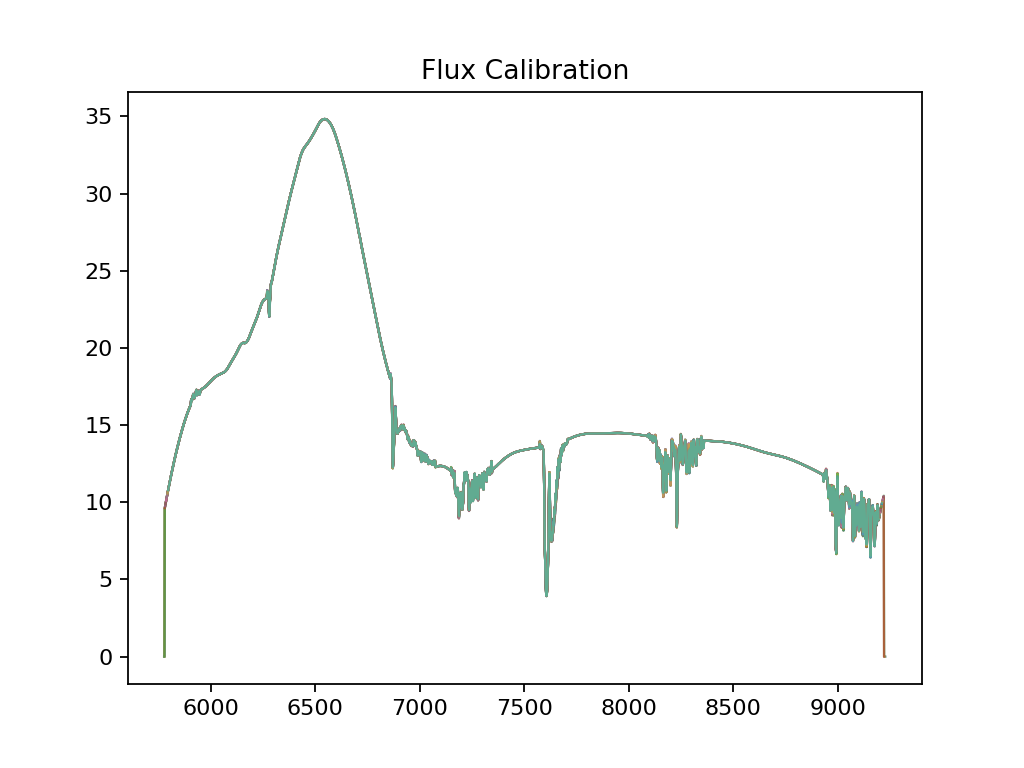

Text(0.5, 1.0, 'Flux Calibration')

In [193]:
fig = plt.figure()
for i in np.arange(0, 300, 10):
    plt.plot(10**calibFrame[3].data[i], fluxCalib[0].data[i], alpha=0.5, lw=1)
plt.title('Flux Calibration')

##### Calculate Wavelengths from Pixel Numbers in spFrame files

In [183]:
xmin = frame[3].data[0][1]
xmax = frame[3].data[0][2]
wavelen_legendre_coeffs = frame[3].data[0][3]

In [184]:
from scipy.special import eval_legendre

In [185]:
def calc_mu(x):
    xmid = (xmax-xmin)/2
    return 2*((x-xmid)/(xmax-xmin))

In [187]:
spec_wavelens = []
for spec_num in range(len(wavelen_legendre_coeffs)):
    log10_wavelen = np.zeros(2048)
    fibers = np.arange(xmin, xmax+0.5)
    for i in range(5):
        log10_wavelen += wavelen_legendre_coeffs[spec_num][i] * eval_legendre(i, calc_mu(fibers))
    wavelen = 10 ** log10_wavelen
    spec_wavelens.append(wavelen)

<IPython.core.display.Javascript object>


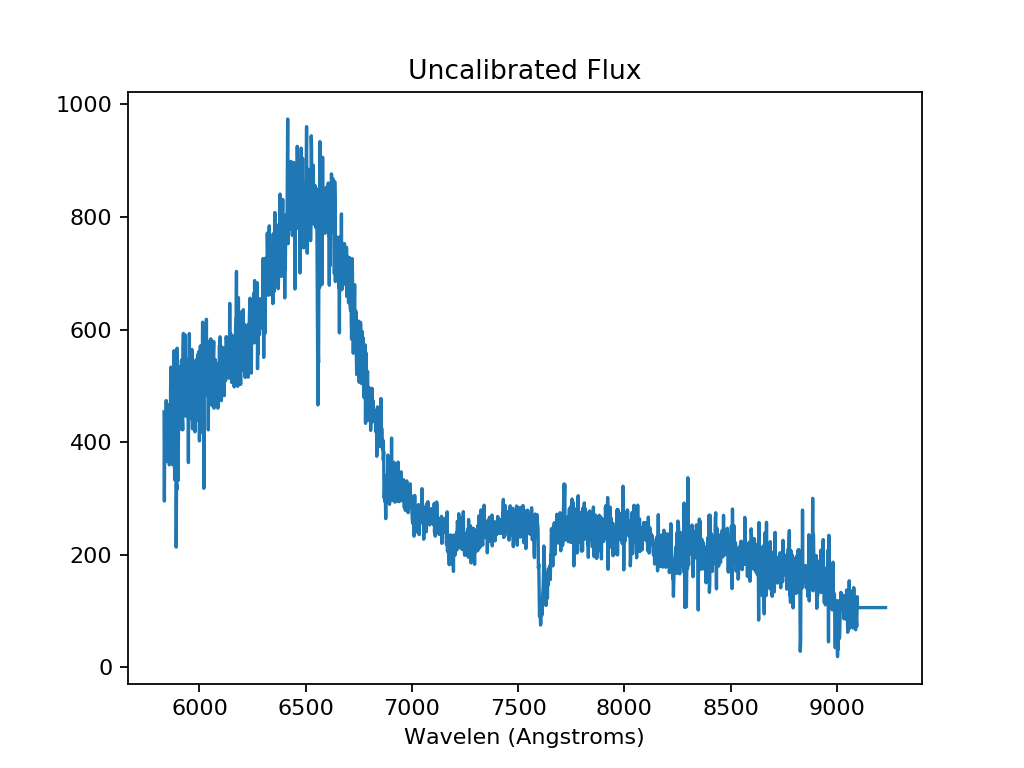

Text(0.5, 1.0, 'Uncalibrated Flux')

In [196]:
fig = plt.figure()
plt.plot(spec_wavelens[0], frame[0].data[0])
plt.xlabel('Wavelen (Angstroms)')
plt.title('Uncalibrated Flux')

Conversion between pixel and wavelength is found in hdu3 of the calibrated flux files.

/astro/users/brycek/.local/lib/python3.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


Text(0.5, 0, 'Wavelength (Angstroms)')

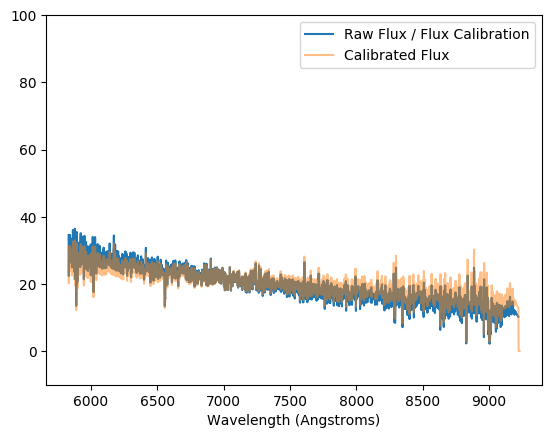

In [99]:
plt.plot(10**calibFrame[3].data[0], (frame[0].data[0]) / fluxCalib[0].data[0], label='Raw Flux / Flux Calibration')
plt.plot(10**calibFrame[3].data[0], calibFrame[0].data[0], label='Calibrated Flux', alpha=0.5)
#plt.plot(calibFrame[6].data[0], alpha=0.5)
plt.ylim(-10, 100)
plt.legend()
plt.xlabel('Wavelength (Angstroms)')

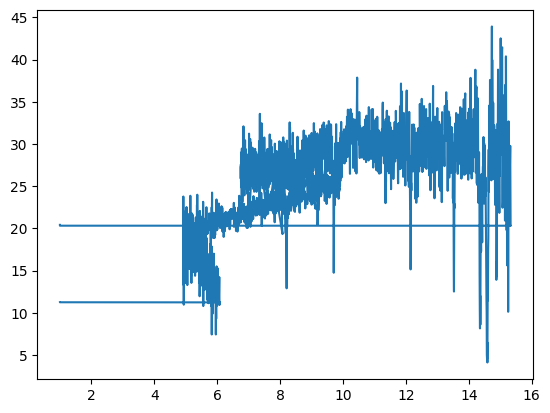

In [484]:
plt.plot(10**plateData[4].data[0], plateData[0].data[0])

In [457]:
frame = fits.open(f'data/{plateNumber}/spFrame-b1-{expIdDownload}.fits.gz')

In [458]:
calibFrame = fits.open(f'data/{plateNumber}/spCFrame-b1-{expIdDownload}.fits')

In [459]:
fluxCalib = fits.open(f'data/{plateNumber}/spFluxcalib-b1-{expIdDownload}.fits.gz')

Text(0.5, 1.0, 'Flux Calibration')

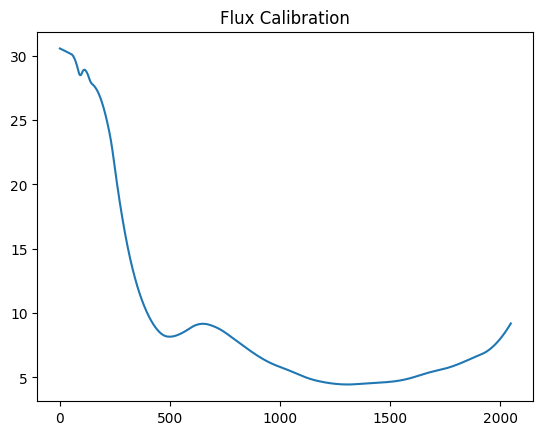

In [460]:
plt.plot(fluxCalib[0].data[0])
#plt.plot(fluxCorr[0].data[1])
plt.title('Flux Calibration')

Text(0.5, 1.0, 'Uncalibrated Flux')

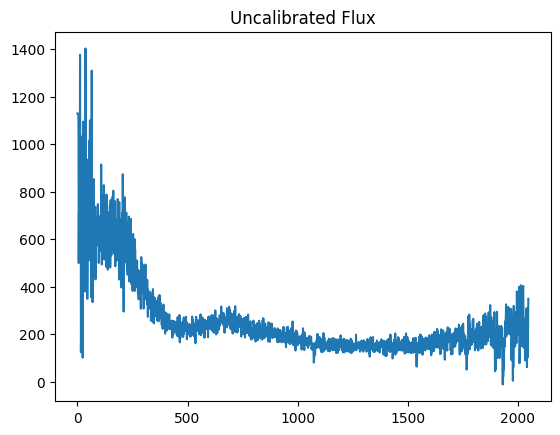

In [461]:
plt.plot(frame[0].data[0])
plt.title('Uncalibrated Flux')

Conversion between pixel and wavelength is found in hdu3 of the calibrated flux files.

Text(0.5, 0, 'Wavelength (Angstroms)')

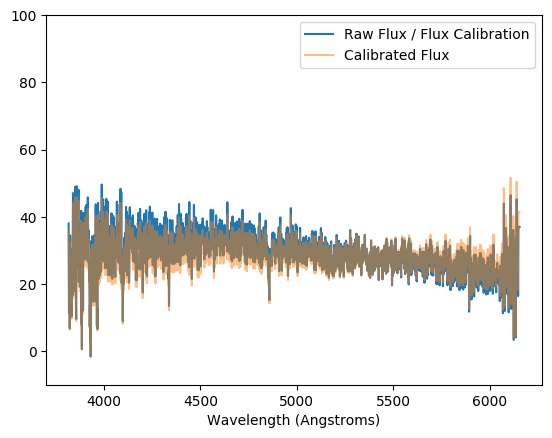

In [462]:
plt.plot(10**calibFrame[3].data[0], (frame[0].data[0] / fluxCalib[0].data[0]), label='Raw Flux / Flux Calibration')
plt.plot(10**calibFrame[3].data[0], calibFrame[0].data[0], label='Calibrated Flux', alpha=0.5)
#plt.plot(calibFrame[6].data[0], alpha=0.5)
plt.ylim(-10, 100)
plt.legend()
plt.xlabel('Wavelength (Angstroms)')